In [1]:
from rlway.pyosrd import OSRD
sim = OSRD(use_case='cvg_dvg', dir='cvg_dvg')

[14:13:18,900] [DEBUG]             [Allowance] computing range n°1
[14:13:18,920] [DEBUG]             [Allowance]   computing section n°1
[14:13:18,921] [DEBUG]             [Allowance]   target time = 125.68289999999999
[14:13:18,922] [DEBUG]             [Allowance]     starting attempt 1
[14:13:18,934] [DEBUG]             [Allowance]     envelope time 183.259
[14:13:18,934] [DEBUG]             [Allowance]     starting attempt 2
[14:13:18,935] [DEBUG]             [Allowance]     envelope time 144.777
[14:13:18,936] [DEBUG]             [Allowance]     starting attempt 3
[14:13:18,937] [DEBUG]             [Allowance]     envelope time 131.011
[14:13:18,937] [DEBUG]             [Allowance]     starting attempt 4
[14:13:18,938] [DEBUG]             [Allowance]     envelope time 125.086
[14:13:18,971] [DEBUG]             [Allowance] computing range n°1
[14:13:18,973] [DEBUG]             [Allowance]   computing section n°1
[14:13:18,973] [DEBUG]             [Allowance]   target time = 125.682

In [77]:
sim=OSRD('../cases/small_infra/')

In [79]:
sim.run()

[15:19:00,747] [DEBUG]             [Allowance] computing range n°1
[15:19:00,785] [DEBUG]             [Allowance]   computing section n°1
[15:19:00,788] [DEBUG]             [Allowance]   target time = 826.04025
[15:19:00,789] [DEBUG]             [Allowance]     starting attempt 1
[15:19:00,803] [DEBUG]             [Allowance]     envelope time 1424.723
[15:19:00,804] [DEBUG]             [Allowance]     starting attempt 2
[15:19:00,805] [DEBUG]             [Allowance]     envelope time 1013.669
[15:19:00,806] [DEBUG]             [Allowance]     starting attempt 3
[15:19:00,807] [DEBUG]             [Allowance]     envelope time 885.83
[15:19:00,808] [DEBUG]             [Allowance]     starting attempt 4
[15:19:00,826] [DEBUG]             [Allowance]     envelope time 833.121
[15:19:00,826] [DEBUG]             [Allowance]     starting attempt 5
[15:19:00,827] [DEBUG]             [Allowance]     envelope time 809.127
[15:19:00,828] [DEBUG]             [Allowance]     starting attempt 6
[15

In [80]:
import plotly.express as px

In [81]:
for train, _ in enumerate(sim.trains):
    for simulation in ['base', 'eco']:
        for record in sim.results[train][simulation+'_simulations'][0]['head_positions']:
            record['time'] += sim.departure_times[train]

In [85]:
simulation += '_simulations'
train = 0
records = [
    record
    for record in sim.results[train][simulation][0]['head_positions']
    # if record['track_section'] in common_tracks
]
offset = sim.results[train][simulation][0]['head_positions'][0]['offset']
offsets = [offset + t['path_offset'] for t in records]
times = [t['time']/60 for t in records]

In [89]:
sim.train_track_sections(2)

['TA0', 'TA6', 'TC1', 'TD0', 'TD2', 'TG0', 'TH0', 'TH1']

In [88]:
sim.train_track_sections(0)

['TA1', 'TA3', 'TA6', 'TE1', 'TE0', 'TF1']

In [91]:
train2 = 2
common_tracks = [
    t
    for t in sim.train_track_sections(train2)
    if t in sim.train_track_sections(train)
]
common_tracks

['TA6']

In [92]:
records = [
    record
    for record in sim.results[train2][simulation][0]['head_positions']
    if record['track_section'] in common_tracks
]
offset_2 = sim.results[train2][simulation][0]['head_positions'][0]['offset']
offsets_2 = [offset_2 + t['path_offset'] for t in records]
times_2 = [t['time']/60 for t in records]

In [96]:
points = sim.points_encountered_by_train(train, ['station'])

In [97]:
import plotly.graph_objects as go

fig = go.Figure(
    data = [
        go.Scatter(x=times, y=offsets, mode='lines', name='train0'),
        go.Scatter(x=times_2, y=offsets_2, mode='lines', name='train1'),
    ],
    layout = {
        "title": 'train 0 (eco)',
        "template": "simple_white",
    },
)

for point in points:
    fig.add_hline(
        y=point['offset'],
        line_width=.5,
        line_dash="dash",
        line_color="black"
    )

fig.update_layout(
    yaxis = dict(
        tickmode = 'array',
        tickvals = [point['offset'] for point in points],
        ticktext = [point['id'] for point in points]
    )
)


<Axes: title={'center': 'train.1 (eco)'}, xlabel='Time [min]'>

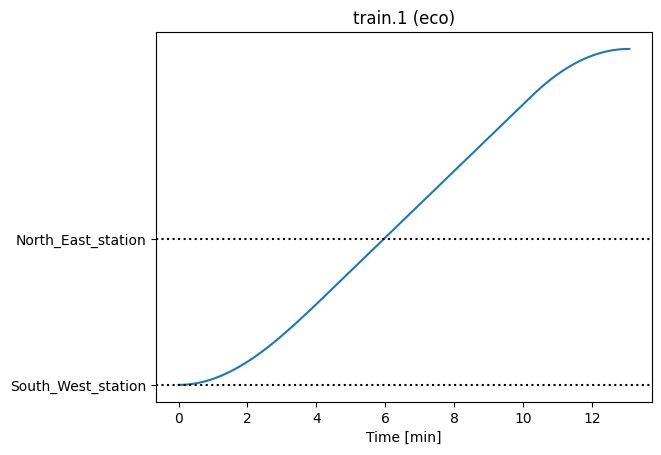

In [98]:
sim.space_time_graph(1)